Generating Binary Masks:   0%|          | 0/20 [00:00<?, ?it/s]

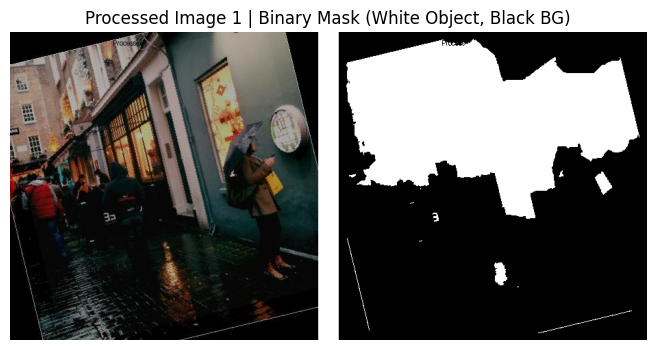

Generating Binary Masks:   5%|▌         | 1/20 [00:10<03:22, 10.67s/it]

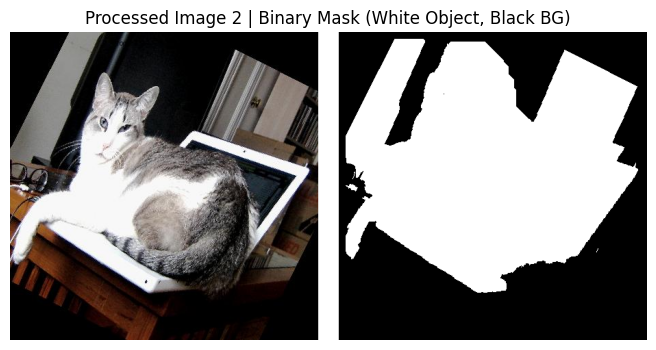

Generating Binary Masks:  10%|█         | 2/20 [00:14<01:56,  6.48s/it]

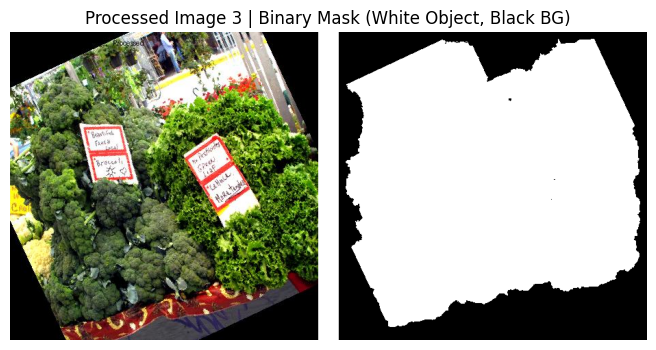

Generating Binary Masks:  15%|█▌        | 3/20 [00:17<01:22,  4.84s/it]

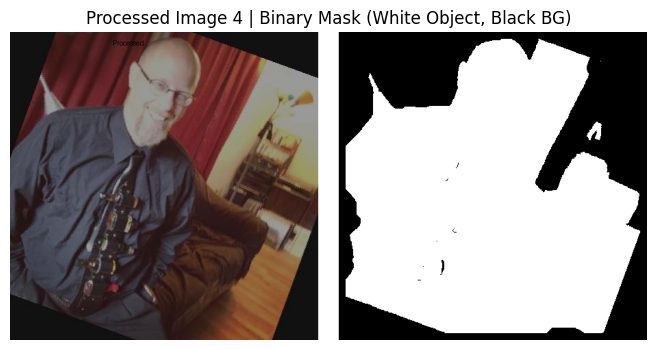

Generating Binary Masks:  20%|██        | 4/20 [00:22<01:20,  5.01s/it]

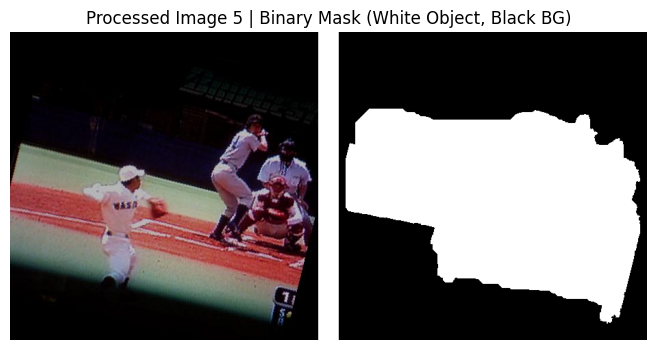

Generating Binary Masks:  25%|██▌       | 5/20 [00:27<01:13,  4.93s/it]

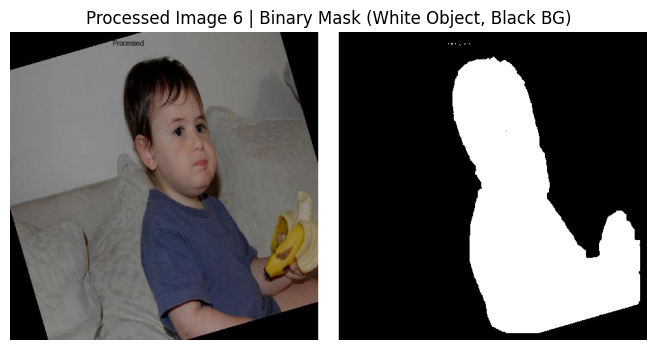

Generating Binary Masks:  30%|███       | 6/20 [00:33<01:15,  5.38s/it]

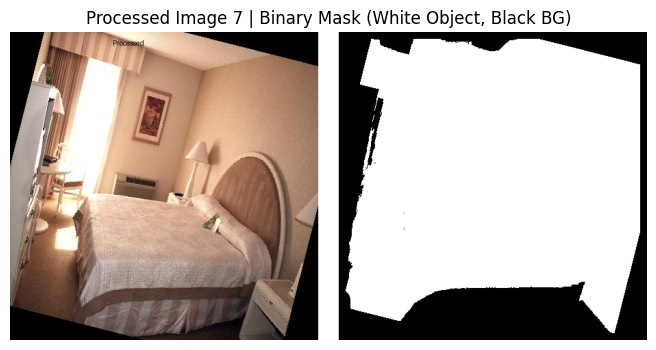

Generating Binary Masks:  35%|███▌      | 7/20 [00:37<01:03,  4.92s/it]

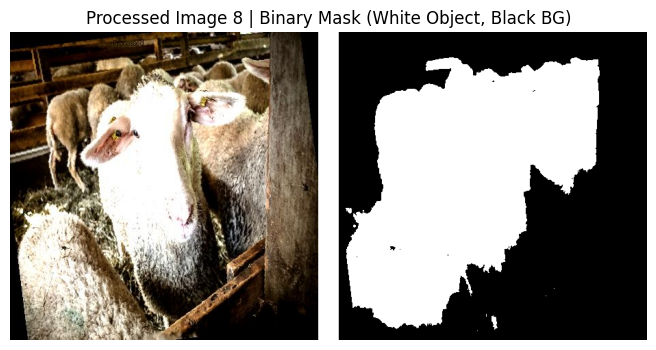

Generating Binary Masks:  40%|████      | 8/20 [00:40<00:53,  4.49s/it]

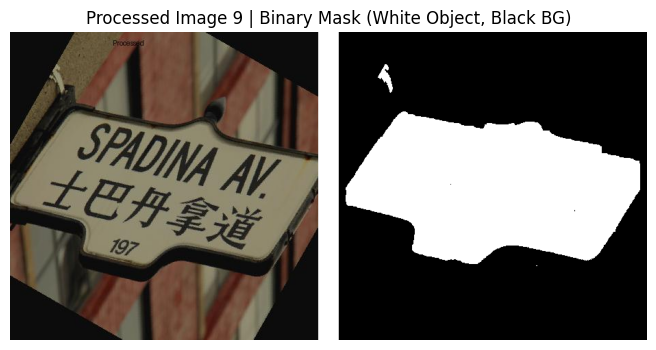

Generating Binary Masks:  45%|████▌     | 9/20 [00:43<00:43,  3.93s/it]

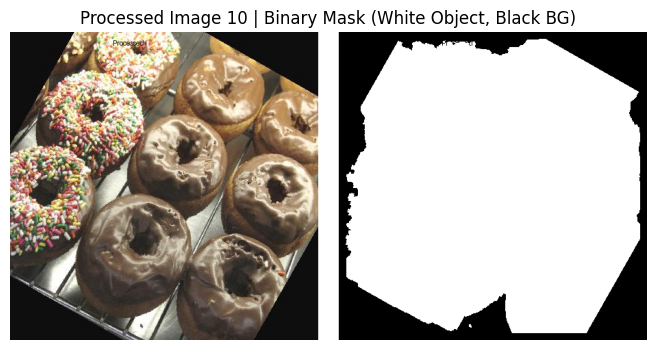

Generating Binary Masks:  50%|█████     | 10/20 [00:47<00:39,  3.92s/it]

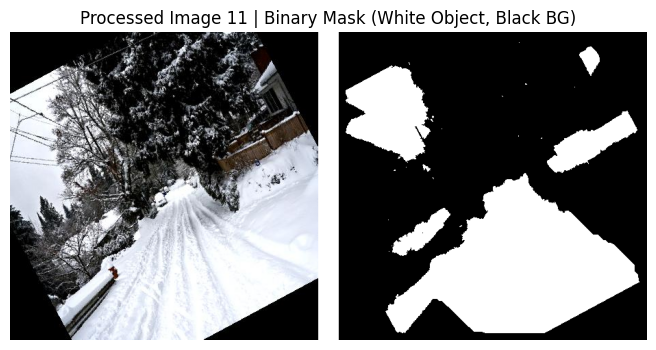

Generating Binary Masks:  55%|█████▌    | 11/20 [00:59<00:57,  6.37s/it]

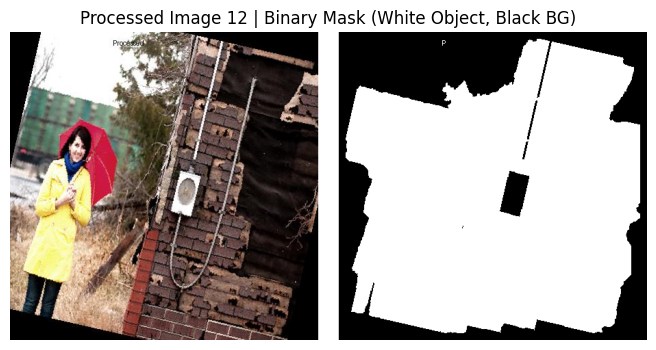

Generating Binary Masks:  60%|██████    | 12/20 [01:02<00:42,  5.34s/it]

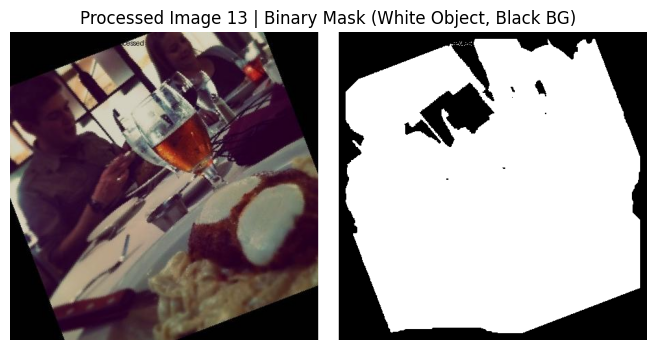

Generating Binary Masks:  65%|██████▌   | 13/20 [01:06<00:34,  4.95s/it]

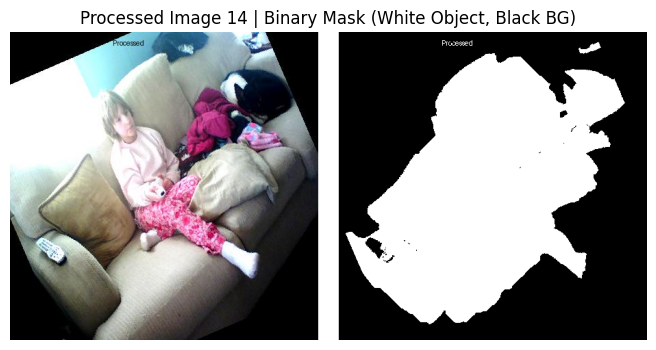

Generating Binary Masks:  70%|███████   | 14/20 [01:12<00:32,  5.39s/it]

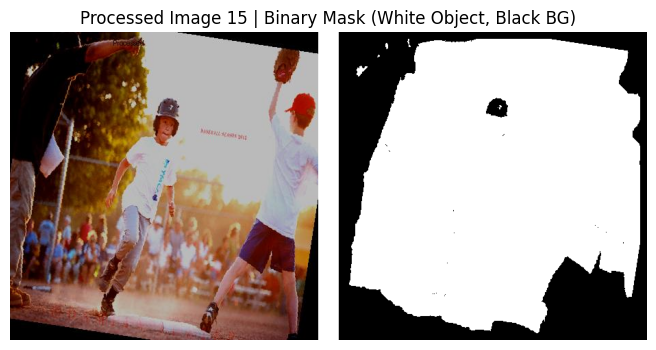

Generating Binary Masks:  75%|███████▌  | 15/20 [01:17<00:25,  5.02s/it]

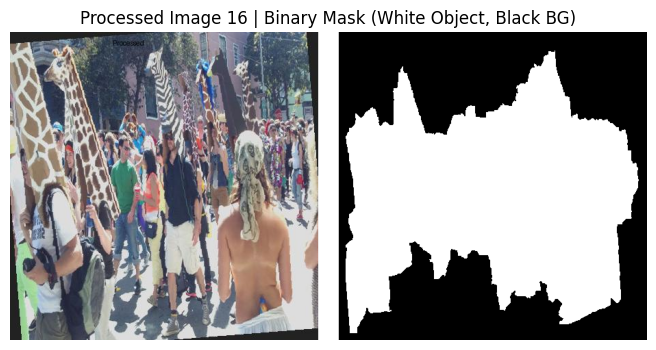

Generating Binary Masks:  80%|████████  | 16/20 [01:26<00:24,  6.24s/it]

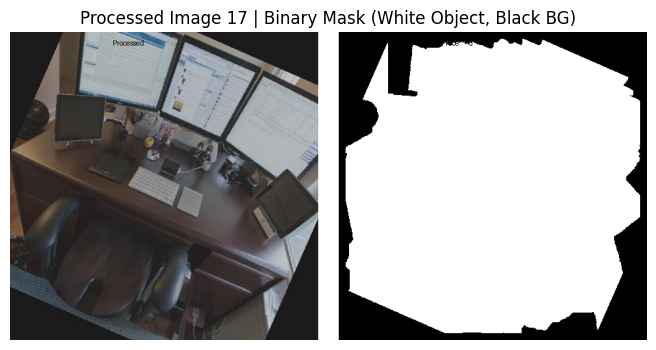

Generating Binary Masks:  85%|████████▌ | 17/20 [01:29<00:15,  5.33s/it]

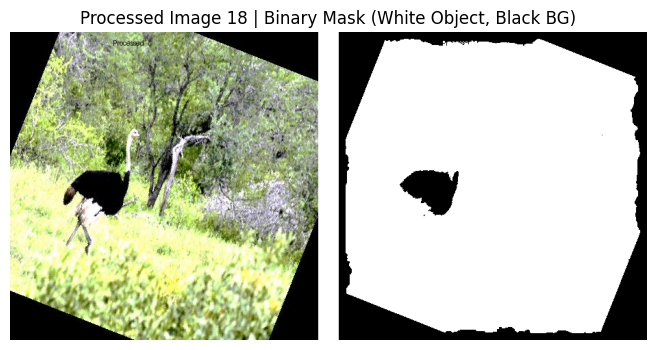

Generating Binary Masks:  90%|█████████ | 18/20 [01:32<00:09,  4.81s/it]

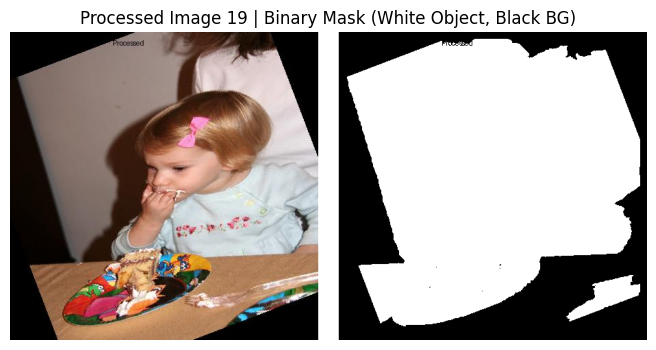

Generating Binary Masks:  95%|█████████▌| 19/20 [01:35<00:04,  4.08s/it]

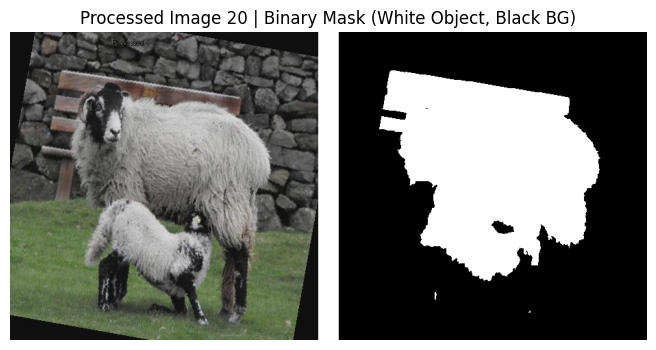

Generating Binary Masks: 100%|██████████| 20/20 [01:39<00:00,  4.96s/it]

✅ Done! Binary masks created only for the processed parts of images and saved in './binary_mask_output'


In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Paths
input_folder = './processed_images'
output_folder = './binary_mask_output'
os.makedirs(output_folder, exist_ok=True)

all_images = os.listdir(input_folder)
sample_images = all_images[:20]  # process only 20 images

for i, img_name in enumerate(tqdm(sample_images, desc="Generating Binary Masks")):
    img_path = os.path.join(input_folder, img_name)
    img = cv2.imread(img_path)

    if img is None:
        print(f"⚠️ Error reading {img_name}")
        continue

    h, w = img.shape[:2]
    gap = 30
    half_width = (w - gap) // 2

    # 👉 Crop only the right (processed) image part
    processed_img = img[:, half_width + gap:]

    # Resize for uniformity
    processed_img = cv2.resize(processed_img, (450, 450))

    # Initialize GrabCut mask
    mask = np.zeros(processed_img.shape[:2], np.uint8)
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # Rectangle around main object
    rect = (10, 10, 430, 430)

    # Apply GrabCut
    cv2.grabCut(processed_img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

    # Convert to binary mask (white object, black background)
    binary_mask = np.where((mask == 2) | (mask == 0), 0, 255).astype('uint8')

    # Convert to RGB for display
    mask_rgb = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)

    # Combine processed + mask
    combined = np.ones((450, 450 * 2 + gap, 3), dtype=np.uint8) * 255
    combined[:, :450] = processed_img
    combined[:, 450 + gap:] = mask_rgb

    # Save
    out_path = os.path.join(output_folder, f"mask_{i+1}.jpg")
    cv2.imwrite(out_path, combined)

    # Show first few
    if i < 20:
        plt.figure(figsize=(9, 4))
        plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
        plt.title(f"Processed Image {i+1} | Binary Mask (White Object, Black BG)")
        plt.axis("off")
        plt.show()

print("✅ Done! Binary masks created only for the processed parts of images and saved in './binary_mask_output'")
